<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# SpaceX  Falcon 9 First Stage Landing Prediction: EDA & Data Visualization

##  Table of contents


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Introduction</li>
        <li>Objectives</li>
        <li>Import libraries</li>
        <li>Exploratory Data Analysis</li>
             <ul>
                <li>Task 1 - Visualize the relationship between Flight Number and Launch Site</li>
            </ul> 
            <ul>
                <li>Task 2 - Visualize the relationship between Payload Mass and Launch Site</li>
            </ul> 
            <ul>
                <li>Task 3 - Visualize the relationship between success rate of each orbit type</li>
            </ul>     
            <ul>
                <li>Task 4 - Visualize the relationship between FlightNumber and Orbit type</li>
            </ul> 
            <ul>
                <li>Task 5 - Visualize the relationship between Payload Mass and Orbit type</li>
            </ul> 
            <ul>
                <li>Task 6 -  Visualize the launch success yearly trend</li>
            </ul> 
        <li>Features Engineering</li>    
            <ul>
                <li>Task 7 - Create dummy variables to categorical columns</li>
            </ul> 
            <ul>
                <li>Task 8 - Cast all numeric columns to float64</li>
            </ul> 
    </ul>
</div>

<hr>

## Introduction

In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage. This lab focuses on Exploratory Data Analysis and Feature Engineering.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


<hr>

## Import Libraries

In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [ ]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis

In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.


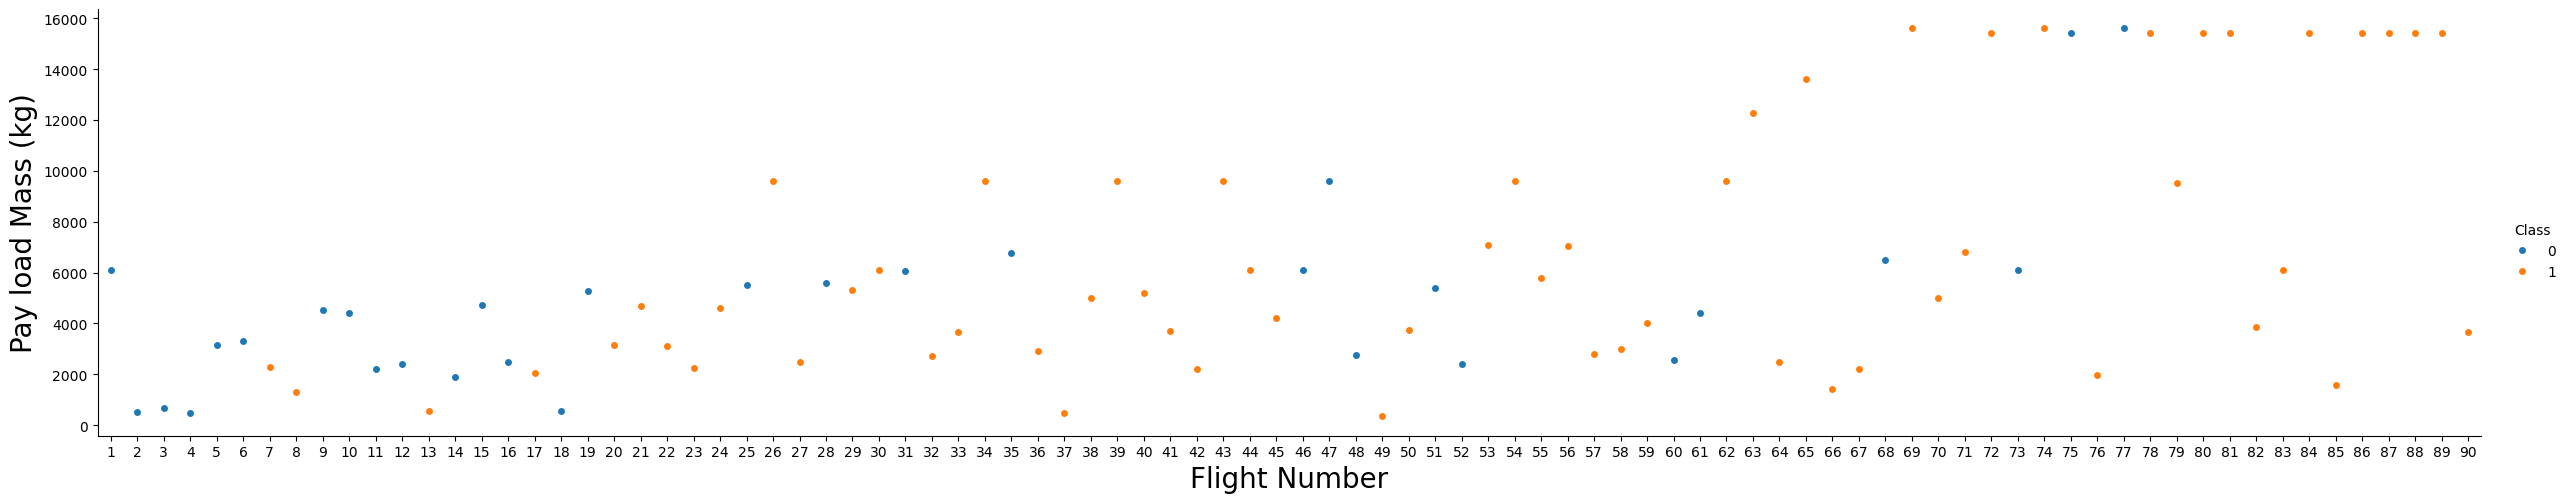

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### Task 1: Visualize the relationship between Flight Number and Launch Site


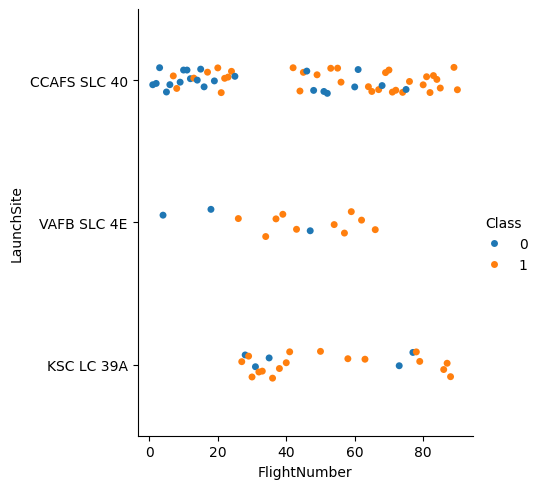

In [6]:
sns.catplot(y='LaunchSite', x='FlightNumber', hue='Class', data=df)

### Task 2: Visualize the relationship between Payload Mass and Launch Site


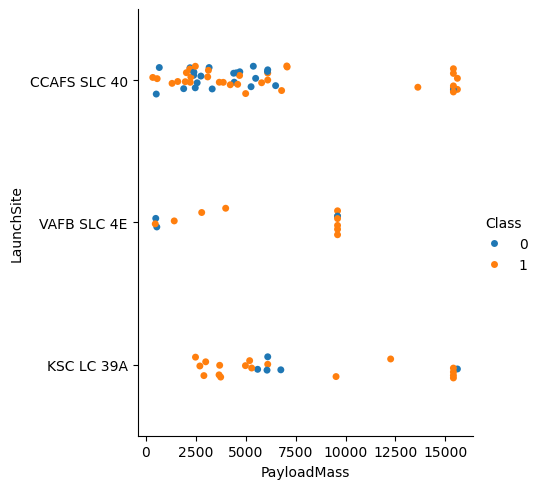

In [8]:
sns.catplot(y='LaunchSite', x='PayloadMass', hue='Class', data=df)

Now if you observe Payload Mass Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### Task 3: Visualize the relationship between success rate of each orbit type


In [10]:
orbit_class = df.groupby('Orbit')['Class'].mean().reset_index()
orbit_class

,Orbit,Class
0,ES-L1,1.000000
1,GEO,1.000000
2,GTO,0.518519
3,HEO,1.000000
4,ISS,0.619048
5,LEO,0.714286
6,MEO,0.666667
7,PO,0.666667
8,SO,0.000000
9,SSO,1.000000


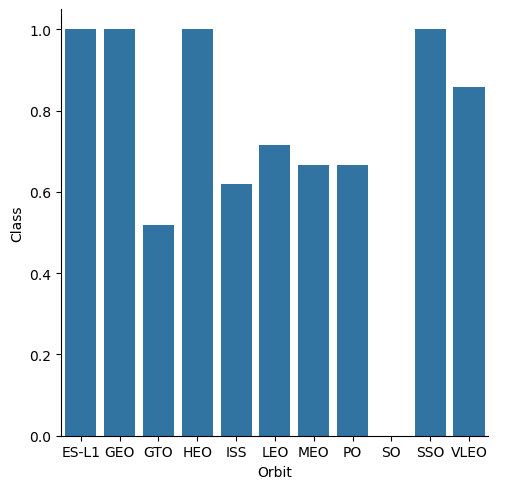

In [11]:
sns.catplot(x='Orbit', y='Class', data=orbit_class, kind='bar')

### Task  4: Visualize the relationship between FlightNumber and Orbit type


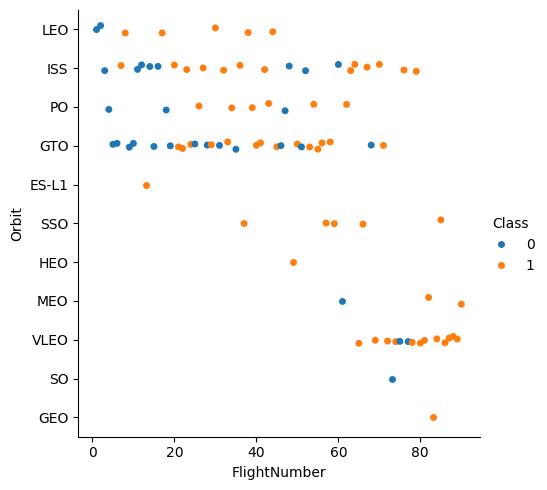

In [13]:
sns.catplot(x='FlightNumber', y='Orbit', hue='Class', data=df)

You can observe that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.


### Task  5: Visualize the relationship between Payload Mass and Orbit type


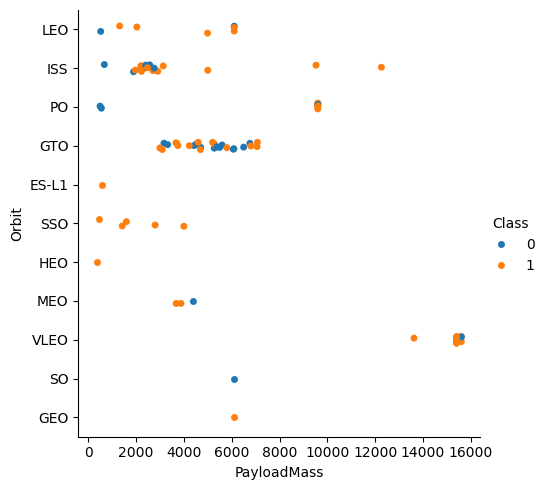

In [15]:
sns.catplot(x='PayloadMass', y='Orbit', hue='Class', data=df)

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.


### Task  6: Visualize the launch success yearly trend


In [16]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Year'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


In [18]:
avg_success_rate_year = df.groupby('Year')['Class'].mean().reset_index()
avg_success_rate_year

,Year,Class
0,2010,0.000000
1,2012,0.000000
2,2013,0.000000
3,2014,0.333333
4,2015,0.333333
5,2016,0.625000
6,2017,0.833333
7,2018,0.611111
8,2019,0.900000
9,2020,0.842105


Text(30.47561728395062, 0.5, 'AVG success rate')

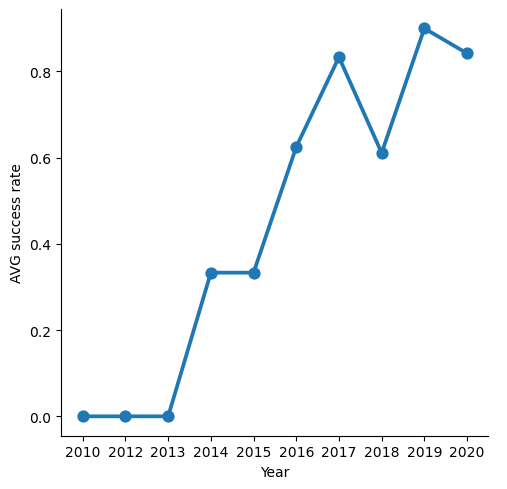

In [19]:
sns.catplot(x='Year', y='Class', data=avg_success_rate_year, kind='point')
plt.ylabel('AVG success rate')

You can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


By now, some preliminary insights about how each important variable would affect the success rate are available. Next, we will select the features that will be used in success prediction in the future module.


In [20]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### Task  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [21]:
# HINT: Use get_dummies() function on the categorical columns

In [22]:
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'], dtype=int)
features_one_hot

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15400.000000,2,True,True,True,5.0,2,0,0,...,0,0,0,0,0,0,0,0,1,0
86,87,15400.000000,3,True,True,True,5.0,2,0,0,...,0,0,0,0,0,0,1,0,0,0
87,88,15400.000000,6,True,True,True,5.0,5,0,0,...,0,0,0,1,0,0,0,0,0,0
88,89,15400.000000,3,True,True,True,5.0,2,0,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
features['Orbit'].unique()

array(['LEO', 'ISS', 'PO', 'GTO', 'ES-L1', 'SSO', 'HEO', 'MEO', 'VLEO',
       'SO', 'GEO'], dtype=object)

In [24]:
features['LaunchSite'].unique()

array(['CCAFS SLC 40', 'VAFB SLC 4E', 'KSC LC 39A'], dtype=object)

In [25]:
features['LandingPad'].unique()

array([nan, '5e9e3032383ecb761634e7cb', '5e9e3032383ecb6bb234e7ca',
       '5e9e3032383ecb267a34e7c7', '5e9e3033383ecbb9e534e7cc',
       '5e9e3032383ecb554034e7c9'], dtype=object)

In [26]:
features['Serial'].unique()

array(['B0003', 'B0005', 'B0007', 'B1003', 'B1004', 'B1005', 'B1006',
       'B1007', 'B1008', 'B1011', 'B1010', 'B1012', 'B1013', 'B1015',
       'B1016', 'B1018', 'B1019', 'B1017', 'B1020', 'B1021', 'B1022',
       'B1023', 'B1025', 'B1026', 'B1028', 'B1029', 'B1031', 'B1030',
       'B1032', 'B1034', 'B1035', 'B1036', 'B1037', 'B1039', 'B1038',
       'B1040', 'B1041', 'B1042', 'B1043', 'B1044', 'B1045', 'B1046',
       'B1047', 'B1048', 'B1049', 'B1050', 'B1054', 'B1051', 'B1056',
       'B1059', 'B1058', 'B1060', 'B1062'], dtype=object)

In [27]:
features_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 80 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     int64  
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     int64  
 3   GridFins                             90 non-null     bool   
 4   Reused                               90 non-null     bool   
 5   Legs                                 90 non-null     bool   
 6   Block                                90 non-null     float64
 7   ReusedCount                          90 non-null     int64  
 8   Orbit_ES-L1                          90 non-null     int32  
 9   Orbit_GEO                            90 non-null     int32  
 10  Orbit_GTO                            90 non-null     int32  
 11  Orbit_HEO                         

### Task  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers, cast the entire dataframe to variable type <code>float64</code>


In [28]:
# HINT: use astype function

In [32]:
features_one_hot.astype('float64')

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15400.000000,6.0,1.0,1.0,1.0,5.0,5.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
features_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 80 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     int64  
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     int64  
 3   GridFins                             90 non-null     bool   
 4   Reused                               90 non-null     bool   
 5   Legs                                 90 non-null     bool   
 6   Block                                90 non-null     float64
 7   ReusedCount                          90 non-null     int64  
 8   Orbit_ES-L1                          90 non-null     int32  
 9   Orbit_GEO                            90 non-null     int32  
 10  Orbit_GTO                            90 non-null     int32  
 11  Orbit_HEO                         

In [34]:
test = features_one_hot.apply(pd.to_numeric, errors='coerce').astype('float64')

In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 80 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     float64
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     float64
 3   GridFins                             90 non-null     float64
 4   Reused                               90 non-null     float64
 5   Legs                                 90 non-null     float64
 6   Block                                90 non-null     float64
 7   ReusedCount                          90 non-null     float64
 8   Orbit_ES-L1                          90 non-null     float64
 9   Orbit_GEO                            90 non-null     float64
 10  Orbit_GTO                            90 non-null     float64
 11  Orbit_HEO                         

In [36]:
test

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15400.000000,6.0,1.0,1.0,1.0,5.0,5.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
